# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
#Import all necessary packages
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score, 
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# statsmodels packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# general formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Overview

- Observations
- Sanity checks

In [2]:
# Import and copy data
hotel_data = pd.read_csv('INNHotelsGroup.csv')
data = hotel_data.copy()
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [3]:
data.shape

(36275, 19)

In [4]:
# Check the non-null count and datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Drop Booking ID
data = data.drop('Booking_ID', axis = 1)

In [6]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000,NaN,NaN,NaN,1.845,0.519,0.000,2.000,2.000,2.000,4.000
no_of_children,36275.000,NaN,NaN,NaN,0.105,0.403,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,36275.000,NaN,NaN,NaN,0.811,0.871,0.000,0.000,1.000,2.000,7.000
no_of_week_nights,36275.000,NaN,NaN,NaN,2.204,1.411,0.000,1.000,2.000,3.000,17.000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.000,NaN,NaN,NaN,0.031,0.173,0.000,0.000,0.000,0.000,1.000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.000,NaN,NaN,NaN,85.233,85.931,0.000,17.000,57.000,126.000,443.000
arrival_year,36275.000,NaN,NaN,NaN,2017.820,0.384,2017.000,2018.000,2018.000,2018.000,2018.000
arrival_month,36275.000,NaN,NaN,NaN,7.424,3.070,1.000,5.000,8.000,10.000,12.000


Explore some of the values from the table above

The following maximum values seem a little suspect, make sure they are not errors.

<li>7 weekend nights</li>
<li>17 week nights</li>
<li>433 day lead time</li>
<li>10 children to a room</li>

In [7]:
data.loc[data['no_of_weekend_nights'] == 7]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
19512,2,0,7,17,Meal Plan 1,0,Room_Type 1,188,2018,7,4,Online,0,0,0,90.950,1,Canceled


In [8]:
data.loc[data['no_of_week_nights'] == 17]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
16977,1,0,6,17,Meal Plan 1,0,Room_Type 1,9,2018,1,28,Online,0,0,0,68.230,1,Not_Canceled
19512,2,0,7,17,Meal Plan 1,0,Room_Type 1,188,2018,7,4,Online,0,0,0,90.950,1,Canceled
33019,1,0,6,17,Meal Plan 1,0,Room_Type 5,2,2018,10,19,Corporate,0,0,0,170.000,0,Canceled


In [9]:
data.loc[data['lead_time'] == 443]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
118,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
1943,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
2279,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
3146,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
3373,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
3746,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
5211,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.000,0,Canceled
11147,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Offline,0,0,0,65.000,0,Canceled
12625,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Offline,0,0,0,65.000,0,Canceled
19141,1,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Offline,0,0,0,60.000,0,Canceled


In [10]:
data.loc[data['no_of_children'] == 10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.450,1,Not_Canceled


In [11]:
data[data.duplicated()].count()

no_of_adults                            10275
no_of_children                          10275
no_of_weekend_nights                    10275
no_of_week_nights                       10275
type_of_meal_plan                       10275
required_car_parking_space              10275
room_type_reserved                      10275
lead_time                               10275
arrival_year                            10275
arrival_month                           10275
arrival_date                            10275
market_segment_type                     10275
repeated_guest                          10275
no_of_previous_cancellations            10275
no_of_previous_bookings_not_canceled    10275
avg_price_per_room                      10275
no_of_special_requests                  10275
booking_status                          10275
dtype: int64

In [12]:
data.drop_duplicates(inplace=True)

Observations:

<ul>
    <li>No missing values</li>
    <li>`Booking_ID` seems redundant</li>
    <li>There appear to be a lot of duplicates in the dataset, drop the duplicates.</li>
    <li>Most of the suspect min/max values that aren't duplicates appear to be legitmate entries.</li>
</ul>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [13]:
# Look at datatypes and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_

Collect all columns based on data types for easier manipulation later.

In [14]:
# Create variables to store the columns based on dtype
cols_to_cat = data.select_dtypes(include = 'object').columns.tolist()
num_cols = data.select_dtypes(include = np.number).columns.tolist()

#Display data type columns
print('Categorical Columns')
print(cols_to_cat)
print('\n')
print('Numerical Columns')
print(num_cols)

Categorical Columns
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


Numerical Columns
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


### Univariate Analysis

#### Categorical Columns

In [15]:
# Cast the object columns to categorical
data[cols_to_cat] = data[cols_to_cat].astype('category')

TYPE_OF_MEAL_PLAN




,Count,Percent
Meal Plan 1,20398,78.454
Not Selected,4463,17.165
Meal Plan 2,1134,4.362
Meal Plan 3,5,0.019


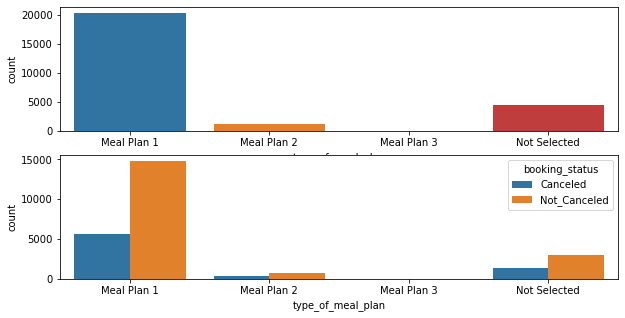

****************************************************************************************************


ROOM_TYPE_RESERVED




,Count,Percent
Room_Type 1,18640,71.692
Room_Type 4,5423,20.858
Room_Type 6,943,3.627
Room_Type 2,600,2.308
Room_Type 5,232,0.892
Room_Type 7,156,0.600
Room_Type 3,6,0.023


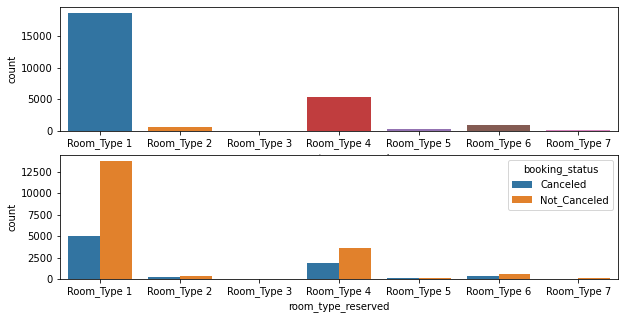

****************************************************************************************************


MARKET_SEGMENT_TYPE




,Count,Percent
Online,20019,76.996
Offline,4112,15.815
Corporate,1412,5.431
Complementary,357,1.373
Aviation,100,0.385


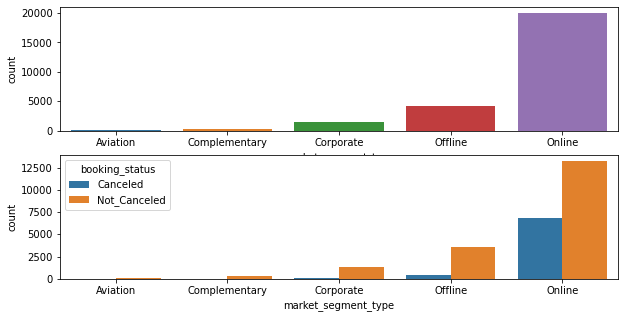

****************************************************************************************************


BOOKING_STATUS




,Count,Percent
Not_Canceled,18558,71.377
Canceled,7442,28.623


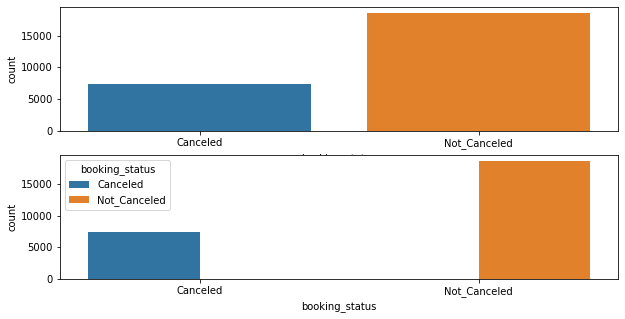

****************************************************************************************************




In [16]:
# Loop through the categorical columns and display value counts, histplot and boxplots.
for col in cols_to_cat:
    
    col_val_df = pd.DataFrame()
    
    col_val_df['Count'] = data[col].value_counts()
    col_val_df['Percent'] = data[col].value_counts(normalize = True) * 100
    
    #Display column name
    print(col.upper())
    print('\n')
    
    #Display Value Counts
    display(col_val_df)
    print('\n')
    
    #Display Distribution
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,5))
    #plt.figure(figsize = (10, 5))
    sns.countplot(data = data, x = col, ax = ax1);
    sns.countplot(data = data, x = col, ax = ax2, hue = 'booking_status');
    plt.show()
    
    #display break
    print('*' * 100)
    print('\n')


Observations:

<ul>
    <li>The majority of bookings stayed in Room Type 1 (71%), and have Meal Plan Type 1 (78%).</li>
    <li>A very small minority stayed in Room Type 3 (0.019%), and had Meal Plan Type 3 (0.021%).</li>
    <li>Over 3/4 of bookings were done via Online.</li>
    <li>71% of bookings did NOT cancel.</li>
    <li>In general, the distribution of categorical variables with respect to the booking status follows the dataset distribution.</li>
   
    
</ul>

#### Numerical Columns

NO_OF_ADULTS




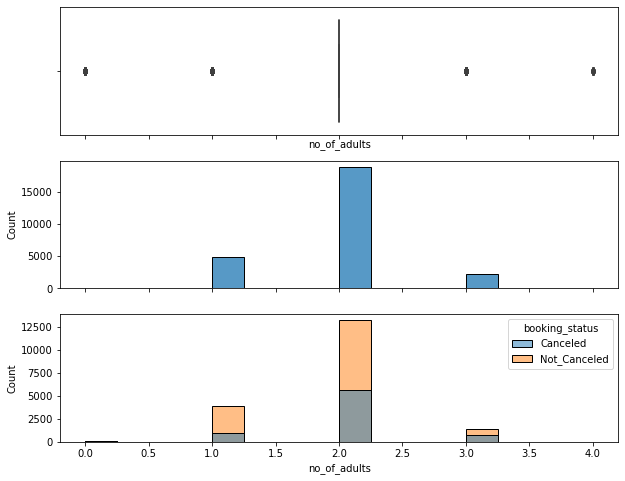

****************************************************************************************************


NO_OF_CHILDREN




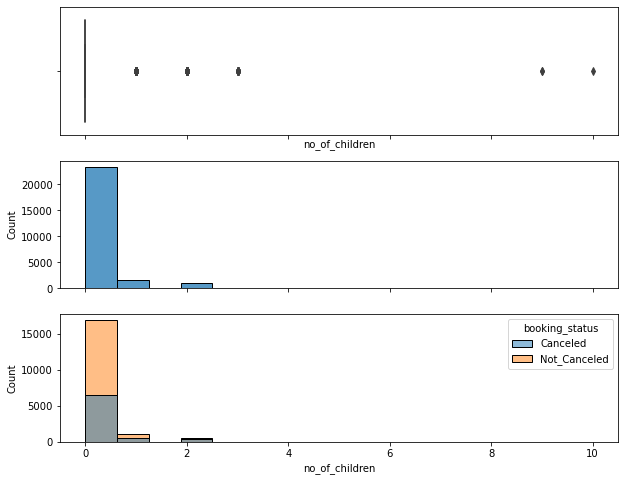

****************************************************************************************************


NO_OF_WEEKEND_NIGHTS




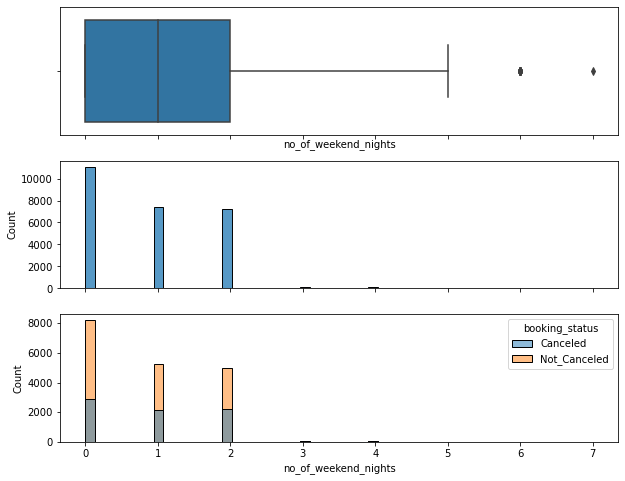

****************************************************************************************************


NO_OF_WEEK_NIGHTS




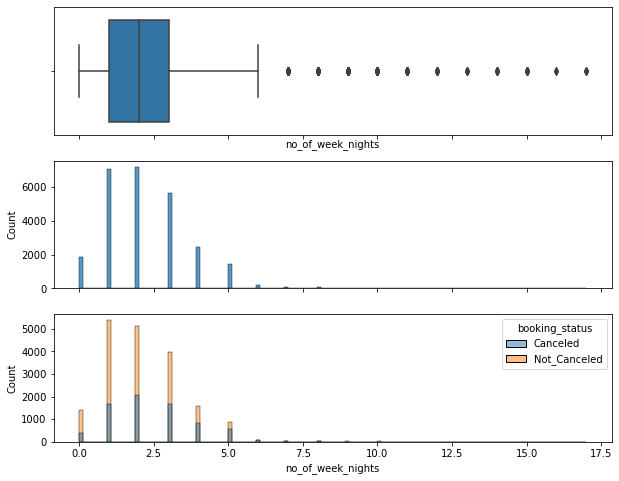

****************************************************************************************************


REQUIRED_CAR_PARKING_SPACE




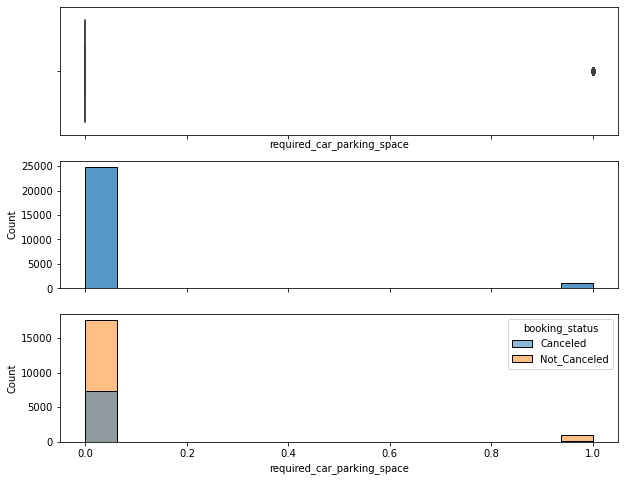

****************************************************************************************************


LEAD_TIME




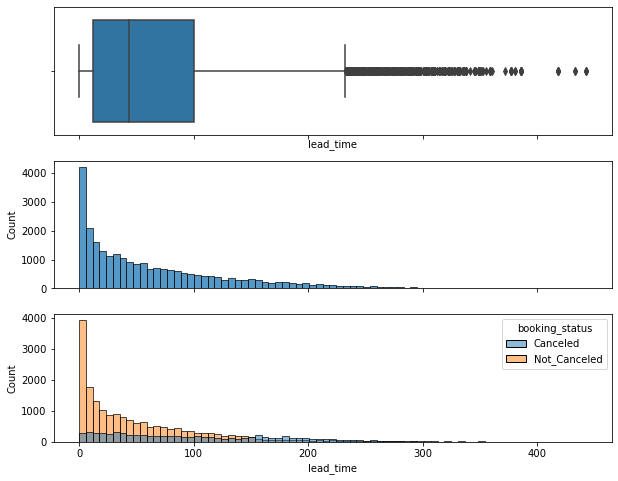

****************************************************************************************************


ARRIVAL_YEAR




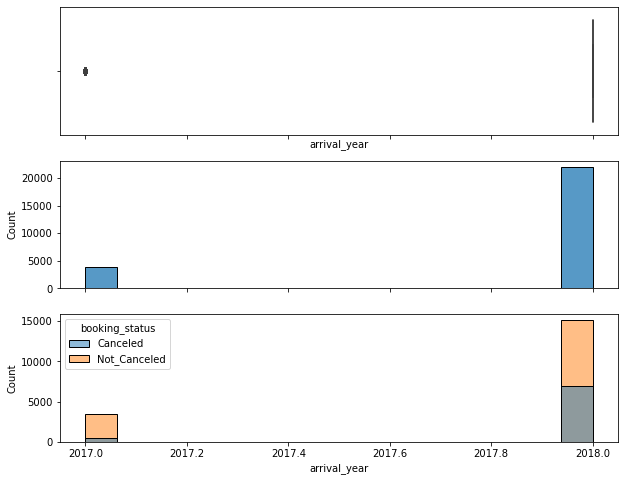

****************************************************************************************************


ARRIVAL_MONTH




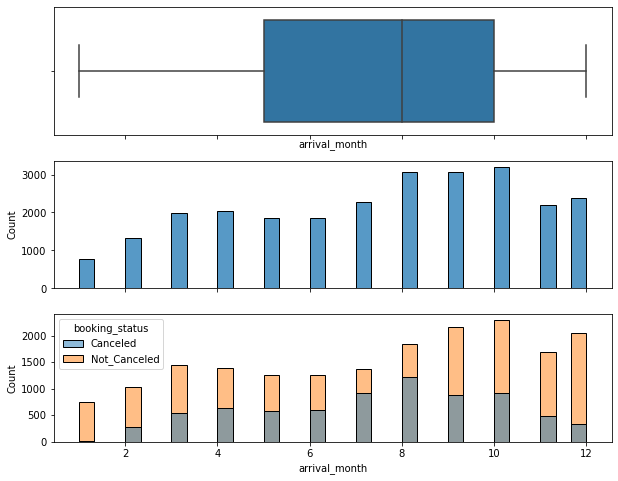

****************************************************************************************************


ARRIVAL_DATE




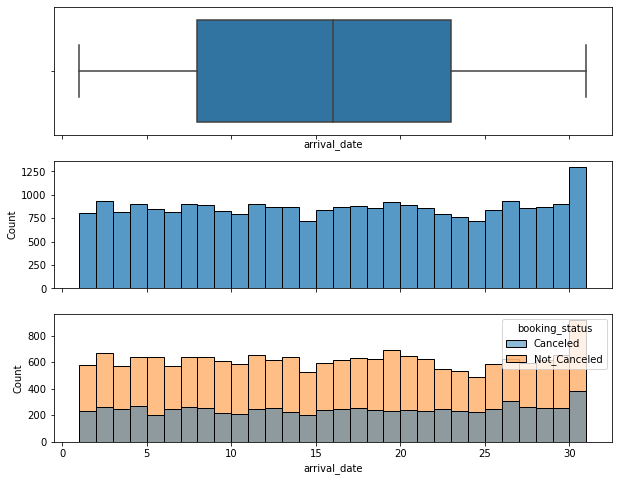

****************************************************************************************************


REPEATED_GUEST




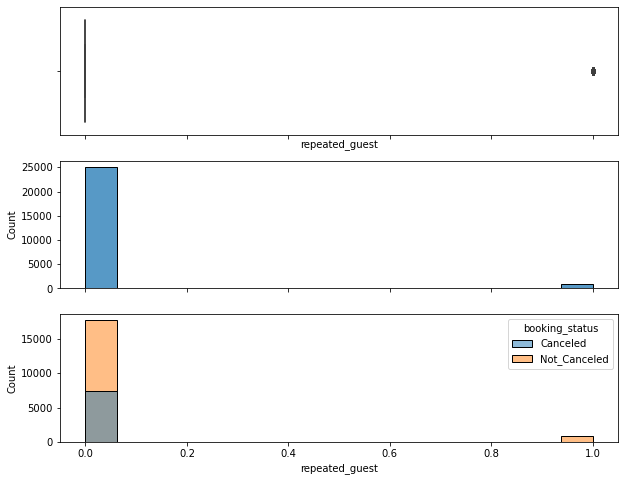

****************************************************************************************************


NO_OF_PREVIOUS_CANCELLATIONS




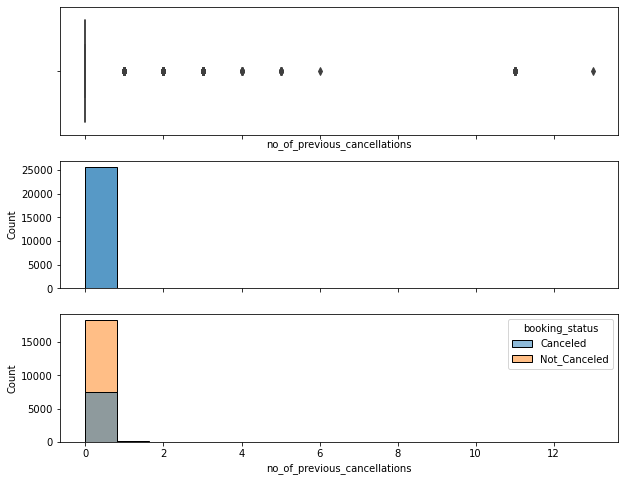

****************************************************************************************************


NO_OF_PREVIOUS_BOOKINGS_NOT_CANCELED




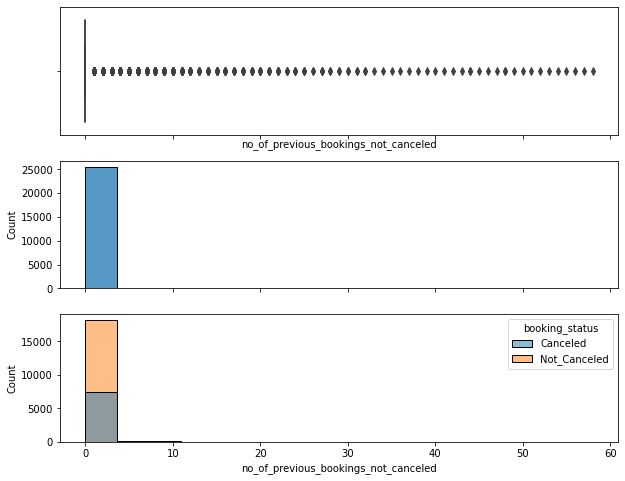

****************************************************************************************************


AVG_PRICE_PER_ROOM




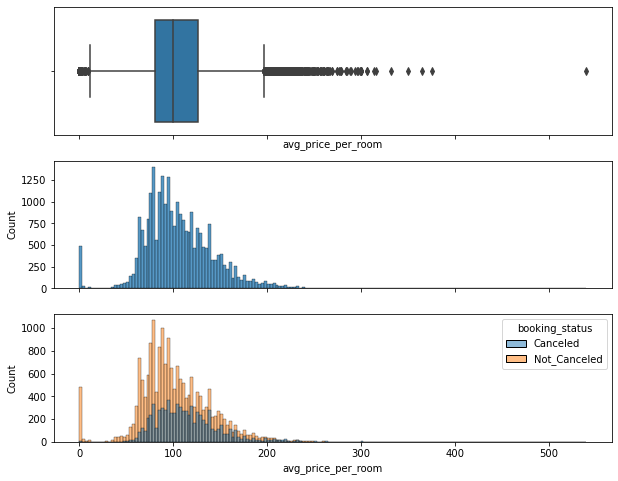

****************************************************************************************************


NO_OF_SPECIAL_REQUESTS




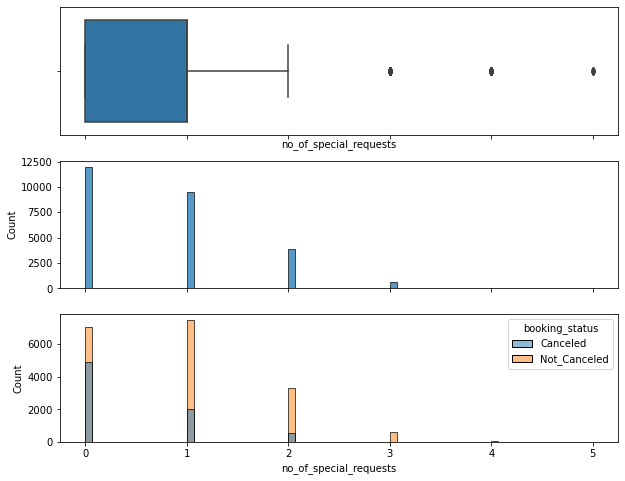

****************************************************************************************************




In [17]:

# Loop through the numerical columns and display the distribution
for col in num_cols:
    
    #Display column name
    print(col.upper())
    print('\n')
    
    #Create subplots with shared x axis
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (10, 8))
    
    sns.boxplot(data = data, x = col, ax = ax1);
    sns.histplot(data = data, x = col, ax = ax2);
    sns.histplot(data = data, x = col, ax = ax3, hue = 'booking_status');
    
    plt.show()
    
    #Create break
    print('*' * 100)
    print('\n')


Observations:

<ul>
    <li>Most variables are discrete in nature.</li>
    <li>Some variables are boolean in nature.</li>
    <li>Of the continuous variables, they are heavily right-skewed.</li>
    <li>Because of the nature of the data, many outliers exist. Since this is vital information, they will be left in during analysis.</li>
    <li>In general, the booking status distribution for each variable follows the dataset distribution. However, the arrival month, lead time, and number of special requests appears to have some influence on booking status.</li>
</ul>

#### Multivariate Data

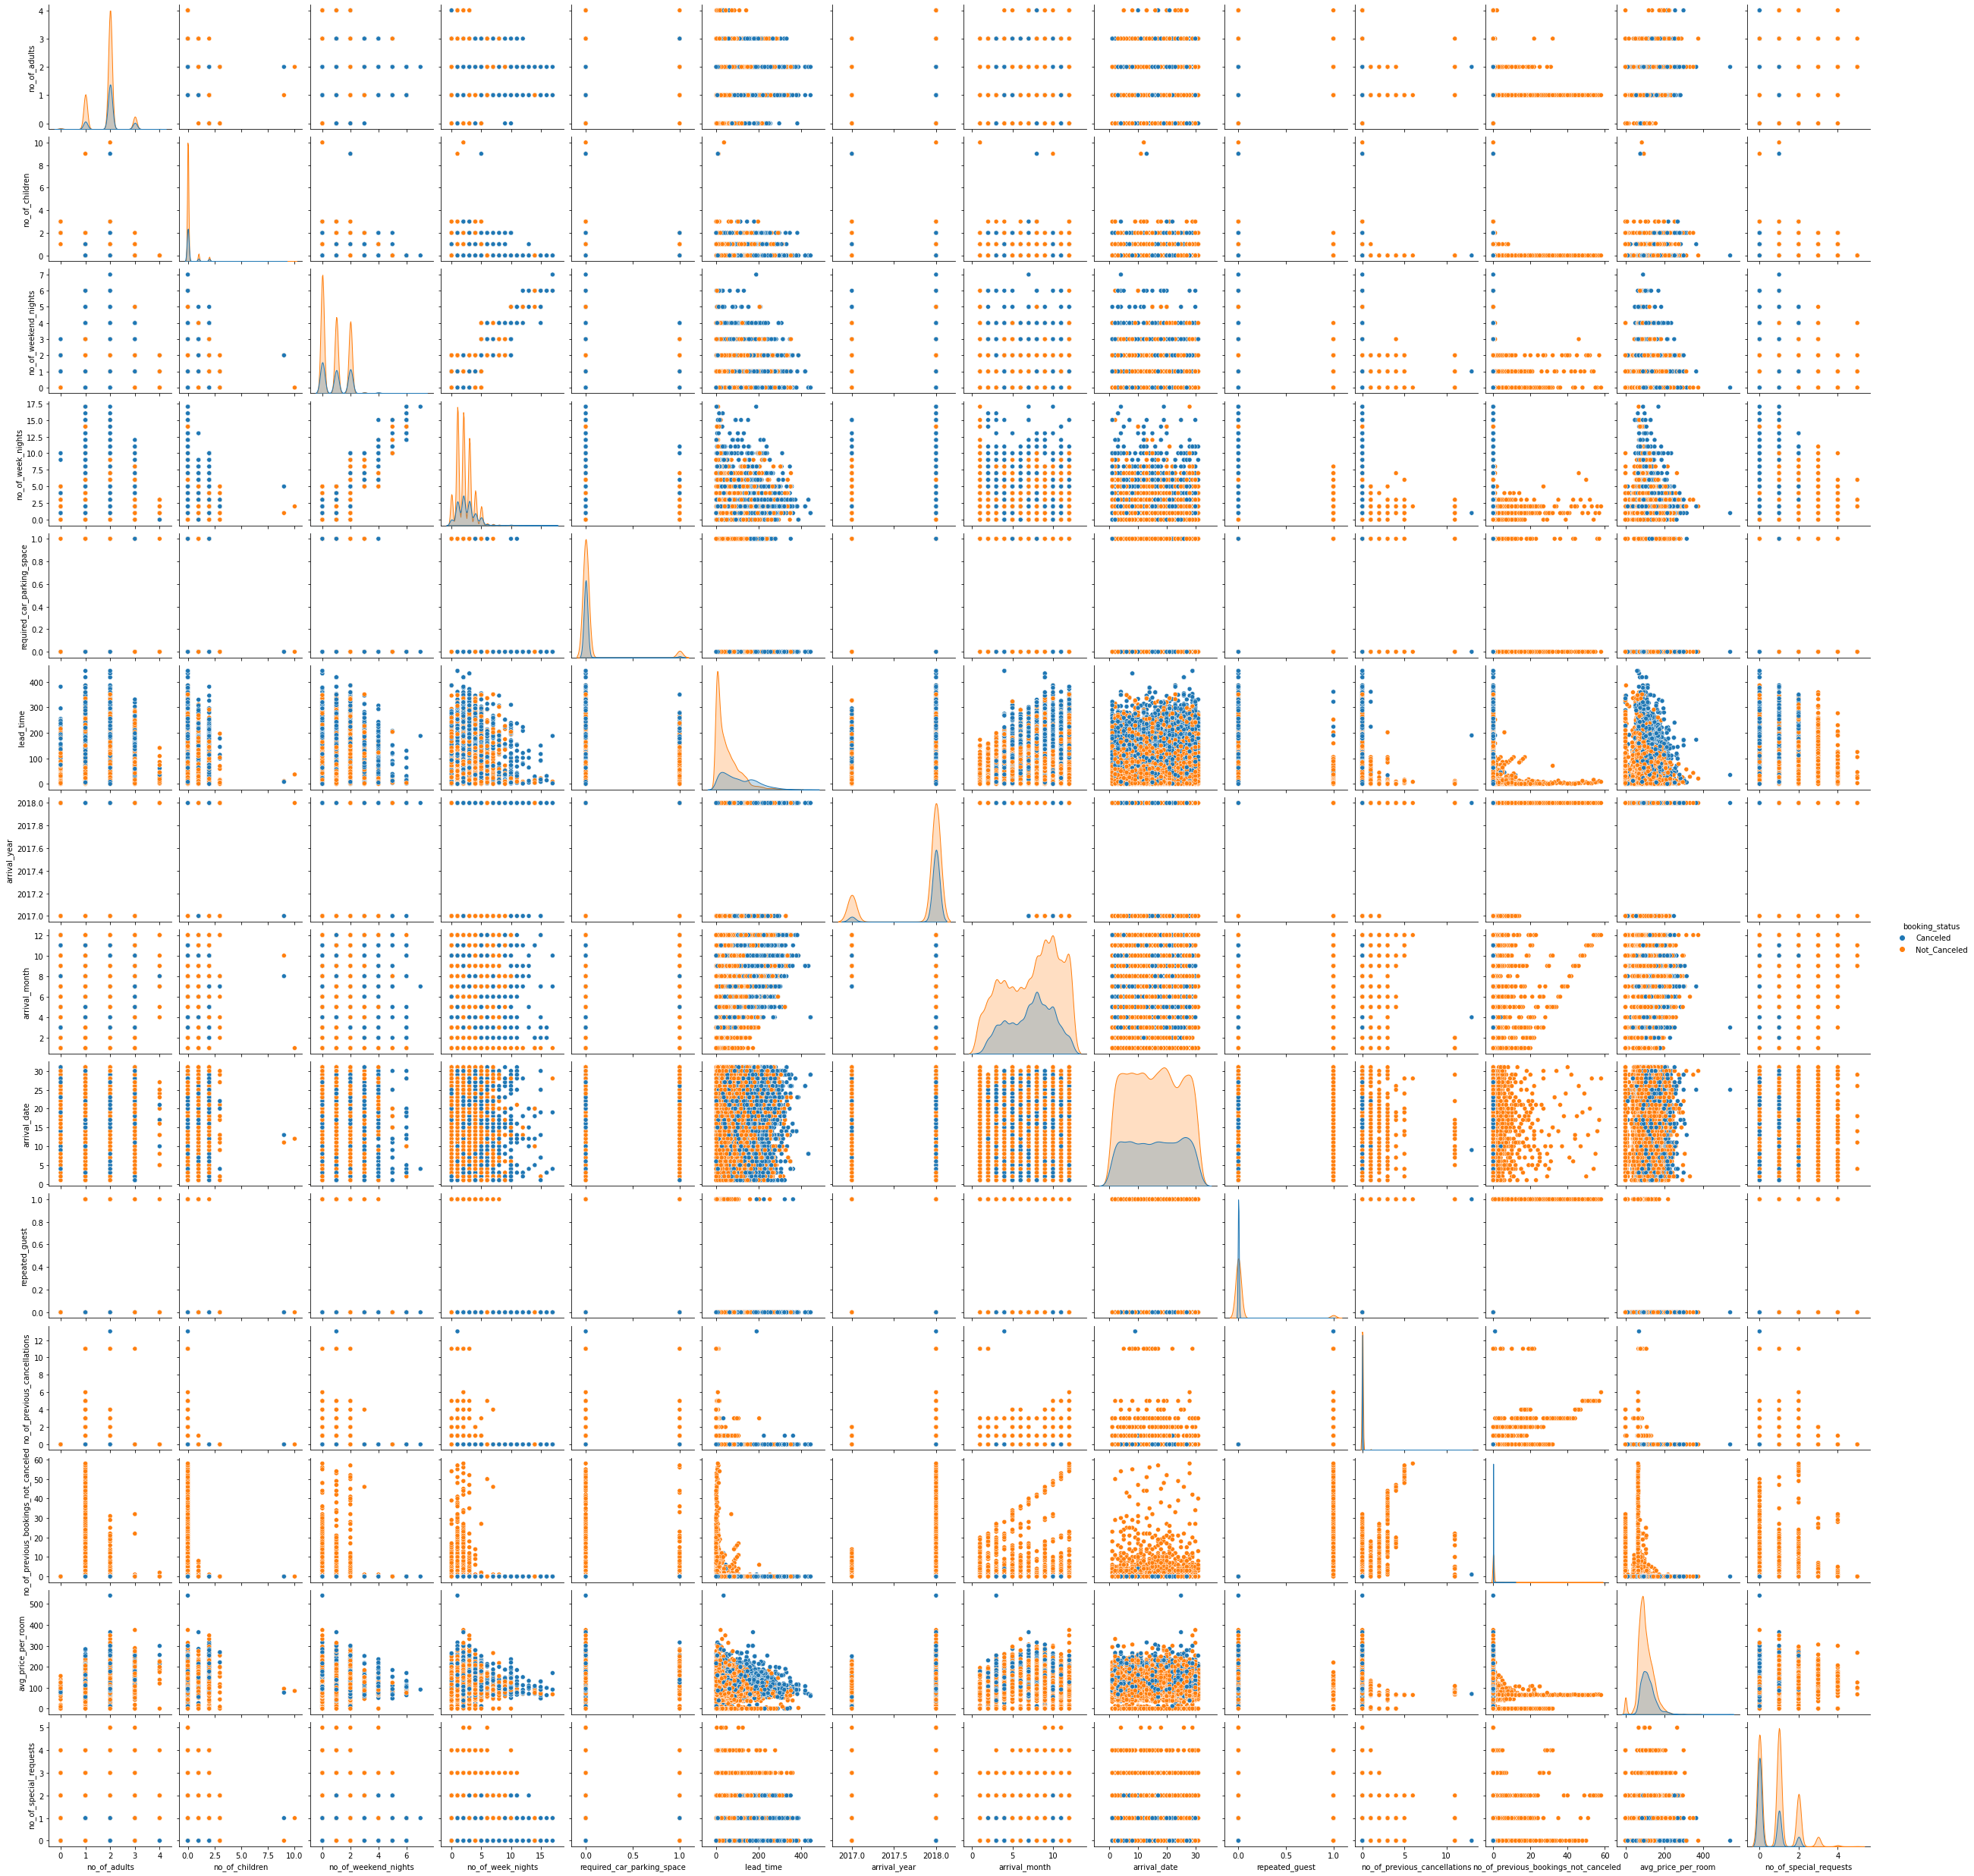

In [18]:
# Multivariate Data

# Observe pair plot and pick out interesting relationships.
sns.pairplot(data = data, hue = 'booking_status');

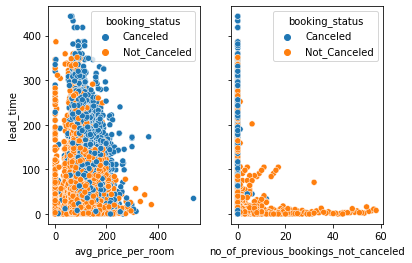

In [19]:
# Lead time shows some intersting scatterplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
sns.scatterplot(data = data, x = 'avg_price_per_room', y = 'lead_time', hue = 'booking_status', ax = ax1);
sns.scatterplot(data = data, x = 'no_of_previous_bookings_not_canceled', y = 'lead_time', hue = 'booking_status', ax = ax2);
plt.show()

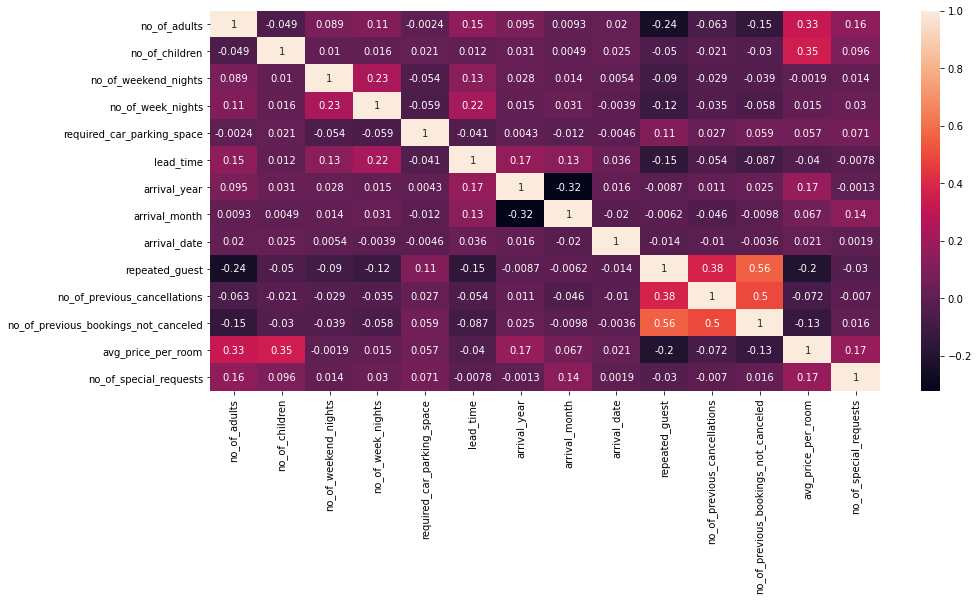

In [20]:
# PLot the correlation values for each variable. 
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

Observations:

<li>Lead time vs. average room price vs. booking status appears to show that, in general, cancelled bookings are booked further out and are close to the median price.</li>
<li>Lead time vs. number of past bookings not cancelled vs. booking status shows that nearly all cancellations are the first time a booking has been cancelled.</li>
<li>A majority of last minute bookings are fulfilled and not cancelled.</li>
<li>There is no strong correlation between any variables, positive or negative.</li>
<li>There is a slight positive correlation between repeated_guest and number of previous bookings not cancelled, which makes logical sense.</li>
<li>There is also slight positive correlation between the average room price and number of adults and number of children.</li>
<li>There is slight negative correlation between arrival year and arrival month, which I find odd... </li>


**Questions**:
1. What are the busiest months in the hotel?


In [21]:
data['arrival_month'].value_counts(normalize = True)

10   0.123
8    0.118
9    0.118
12   0.092
7    0.088
11   0.084
4    0.078
3    0.077
6    0.071
5    0.071
2    0.051
1    0.030
Name: arrival_month, dtype: float64

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

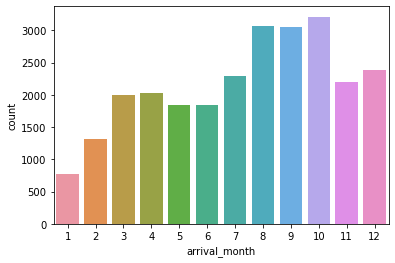

In [22]:
sns.countplot(data = data, x = 'arrival_month')

October is the single busiest month, followed closely by August and September

2. Which market segment do most of the guests come from?


In [23]:
data['market_segment_type'].value_counts(normalize = True)

Online          0.770
Offline         0.158
Corporate       0.054
Complementary   0.014
Aviation        0.004
Name: market_segment_type, dtype: float64

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

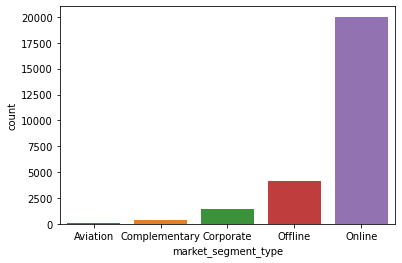

In [24]:
sns.countplot(data = data, x = 'market_segment_type')

Over three quarters of all bookings are made online.

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?


In [25]:
data.groupby(by = 'market_segment_type')['avg_price_per_room'].median().sort_values(ascending = True)

market_segment_type
Complementary     0.000
Corporate        70.000
Offline          80.750
Aviation         95.000
Online          108.000
Name: avg_price_per_room, dtype: float64

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

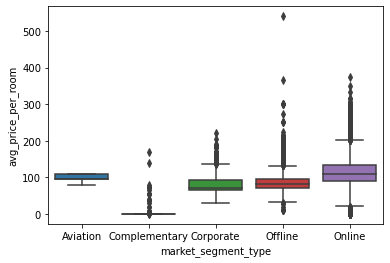

In [26]:
sns.boxplot(data = data, x = 'market_segment_type', y = 'avg_price_per_room')

On average, Online bookings have the highest price at 108 per night.

Complementary rooms have no associated room price.

Corporate bookings have the lowest, non-zero price at 70 per night, on average.

4. What percentage of bookings are canceled? 


In [27]:
data['booking_status'].value_counts(normalize = True)

Not_Canceled   0.714
Canceled       0.286
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

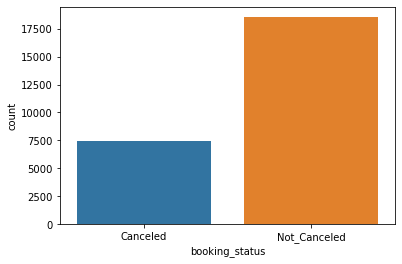

In [28]:
sns.countplot(data = data, x = 'booking_status')

In the data presented, roughtly 28.6% of all bookings are cancelled.

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?


In [29]:
data.groupby(by = 'repeated_guest')['booking_status'].value_counts(normalize = True)

repeated_guest  booking_status
0               Not_Canceled     0.704
                Canceled         0.296
1               Not_Canceled     0.989
                Canceled         0.011
Name: booking_status, dtype: float64

Only 1.1% of repeat guests cancel their bookings.

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [30]:
data.groupby(by = 'no_of_special_requests')['booking_status'].value_counts(normalize = True)

no_of_special_requests  booking_status
0                       Not_Canceled     0.590
                        Canceled         0.410
1                       Not_Canceled     0.790
                        Canceled         0.210
2                       Not_Canceled     0.862
                        Canceled         0.138
3                       Not_Canceled     1.000
4                       Not_Canceled     1.000
5                       Not_Canceled     1.000
Name: booking_status, dtype: float64

It appears the more special requests that are made, the less likely a customer is to cancel the booking.
Statistical analysis would be needed to back up this claim.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [31]:
# Check out the columns and data types to work on preparing them for modeling.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          26000 non-null  int64   
 1   no_of_children                        26000 non-null  int64   
 2   no_of_weekend_nights                  26000 non-null  int64   
 3   no_of_week_nights                     26000 non-null  int64   
 4   type_of_meal_plan                     26000 non-null  category
 5   required_car_parking_space            26000 non-null  int64   
 6   room_type_reserved                    26000 non-null  category
 7   lead_time                             26000 non-null  int64   
 8   arrival_year                          26000 non-null  int64   
 9   arrival_month                         26000 non-null  int64   
 10  arrival_date                          26000 non-null  int64   
 11  ma

In [32]:
# Check the shape of the dataset.
data.shape

(26000, 18)

In [33]:
# Check the values of the categorical target variable
data['booking_status'].value_counts()

Not_Canceled    18558
Canceled         7442
Name: booking_status, dtype: int64

In [34]:
# Create a map to replace the default strings to binary
booking_map = {
    'Not_Canceled': 0,
    'Canceled': 1
}

In [35]:
# Map the dictionary to the original column
data['booking_status'] = data['booking_status'].map(booking_map)

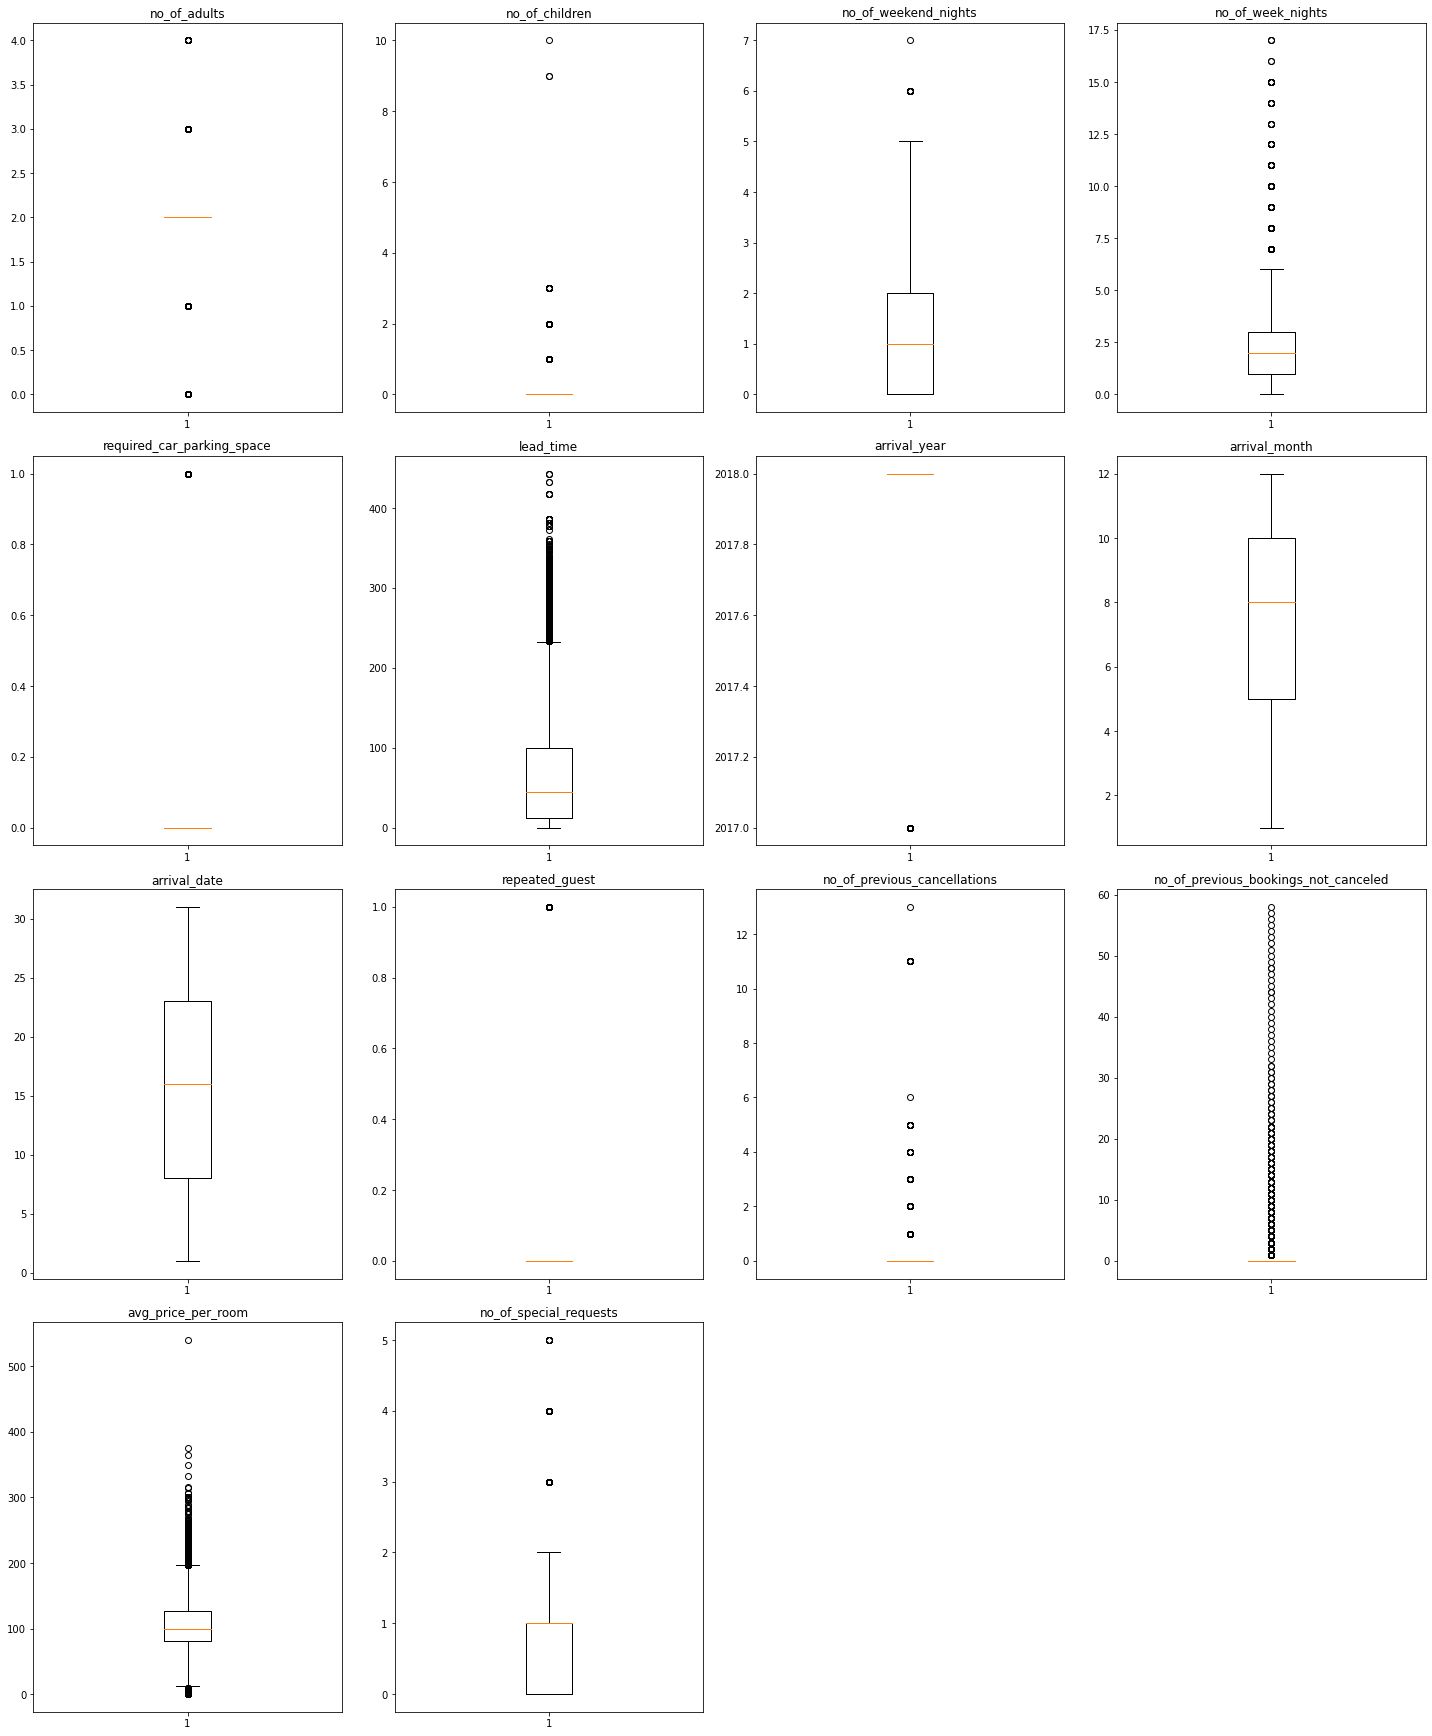

In [36]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Due to the categorical nature of the variables, the outliers will be included in the building of the model.

Split the data into the predictors and target variables.

In [37]:
#Create the X and y variables for model building
X = data.drop('booking_status', axis = 1)
y = data['booking_status']

In [38]:
# Deal with the categorical variables
X = pd.get_dummies(X, drop_first = True)

In [39]:
# Add constant for modeling
X = sm.add_constant(X)

In [40]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:
# Check the shape of the training data. 
print(X_train.shape)
print(X_test.shape)
print('\n')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('\n')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

(18200, 28)
(7800, 28)


Percentage of classes in training set:
0   0.712
1   0.288
Name: booking_status, dtype: float64


Percentage of classes in test set:
0   0.719
1   0.281
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18200 entries, 13890 to 237
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 18200 non-null  float64
 1   no_of_adults                          18200 non-null  int64  
 2   no_of_children                        18200 non-null  int64  
 3   no_of_weekend_nights                  18200 non-null  int64  
 4   no_of_week_nights                     18200 non-null  int64  
 5   required_car_parking_space            18200 non-null  int64  
 6   lead_time                             18200 non-null  int64  
 7   arrival_year                          18200 non-null  int64  
 8   arrival_month                         18200 non-null  int64  
 9   arrival_date                          18200 non-null  int64  
 10  repeated_guest                        18200 non-null  int64  
 11  no_of_previou

In [43]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13890,1.000,2,2,1,3,0,86,2018,10,24,0,0,0,221.180,0,1,0,0,0,0,0,0,1,0,0,0,0,1
16078,1.000,2,0,1,3,0,211,2018,8,25,0,0,0,90.950,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8973,1.000,2,1,2,4,0,121,2018,9,9,0,0,0,89.760,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5715,1.000,2,0,0,2,0,38,2018,9,16,0,0,0,137.520,0,0,0,0,0,0,0,1,0,0,0,0,0,1
25849,1.000,1,0,0,1,0,0,2018,11,29,0,0,0,79.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Since most of the data was not transformed into a different encoding, EDA has not changed much.

## Building a Logistic Regression model

### Model can make wrong predictions as:
1. Predicting a booking will be cancelled and it is not cancelled.
2. Predicting a booking will not be cancelled and it is cancelled.

### Which case is more important? 
* Option 2 is more important based on the following:

* If we predict a booking will be cancelled and it is not cancelled, there is a potential strain on resources, but ultimately no financial pit falls in the revenue stream. 

* However, if we predict a booking will not be cancelled but it is cancelled, the hotel loses out on potential revenue.


### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of identifying both the classes correctly.

In [44]:
# defining functions used in Great Learning lectures. 
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [45]:
# defining functions used in Great Learning lectures. 
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [46]:
# define which Logit method to use on the model building
logit_method = 'newton'

In [47]:
# Statsmodel Logit Function

logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(method = logit_method, disp=False) 

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                18200
Model:                          Logit   Df Residuals:                    18172
Method:                           MLE   Df Model:                           27
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.3207
Time:                        19:35:04   Log-Likelihood:                -7426.5
converged:                      False   LL-Null:                       -10932.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -418.2483    156.622     -2.670      0.008    -725.221    -111.275
no_of_adults                            -0.0194      

C:\Users\bendp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model performance evaluation

#### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [48]:
# Used in Great Learning lectures. 
# Create a series with the values showing high VIF
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)

vif_series.sort_values(ascending = False).head()

const                               42679265.783
market_segment_type_Online                50.737
market_segment_type_Offline               38.892
market_segment_type_Corporate             15.339
market_segment_type_Complementary          5.117
dtype: float64

The 'market segment' columns display high levels of multicollinearity. These columns will be dropped to better train the model.

In [49]:
# Drop the market segment columns.
X_train2 = X_train.drop(['market_segment_type_Complementary' , 'market_segment_type_Corporate' , 'market_segment_type_Offline', 'market_segment_type_Online'], axis = 1)

Repeat the VIF calculations to evaluate any residual multicollinearity

In [50]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)

vif_series.sort_values(ascending = False).head()

const                                  42490653.382
no_of_children                                2.052
room_type_reserved_Room_Type 6                2.020
avg_price_per_room                            1.783
no_of_previous_bookings_not_canceled          1.741
dtype: float64

All multicollinearity has been removed.

Remove all high p-value columns

In [51]:
# the following process used in Great Learning lectures. 
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7']


In [52]:
# Create a new dataframe with only the values deemed important by the model.
X_train3 = X_train2[selected_features]

In [53]:
# Create a model with only the new columns
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit(method = logit_method, disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                18200
Model:                          Logit   Df Residuals:                    18184
Method:                           MLE   Df Model:                           15
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.2708
Time:                        19:35:07   Log-Likelihood:                -7972.2
converged:                       True   LL-Null:                       -10932.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -387.7527    151.213     -2.564      0.010    -684.126     -91.380
no_of_children                     0.1612      0.055      2.927      0.

The above model has been tuned to remove multicollinearity and insignificant variables.


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [54]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
Odds,0.000,1.175,1.081,1.130,0.241,1.015,1.210,0.945,0.094,1.024,0.283,0.542,2.163,0.303,0.420,0.217
Change_odd%,-100.000,17.491,8.096,13.037,-75.859,1.494,20.958,-5.451,-90.563,2.401,-71.714,-45.787,116.260,-69.691,-58.010,-78.256


### Coefficient interpretations

* `no_of_children`: Holding all other features constant a 1 unit change in number of children will increase the odds of a cancellation by 1.175 times or a 17.49% increase in odds of cancelling.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in the required_car_parking_space will decrease the odds of a cancellation by 0.241 times or a decrease of 75.86% decrease in odds of cancelling a reservation.

Now it can be evaluated by the confusion matrix.

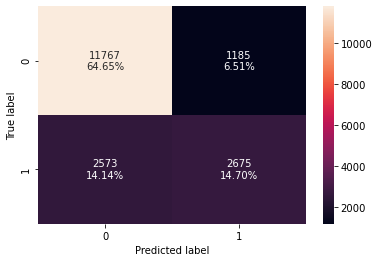

In [55]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [56]:
# Evaluate the model using the training data
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.794,0.510,0.693,0.587


A recall score of 0.51 is pretty abysmal. The following code is used to identify possibilities for tuning the model to perform better.

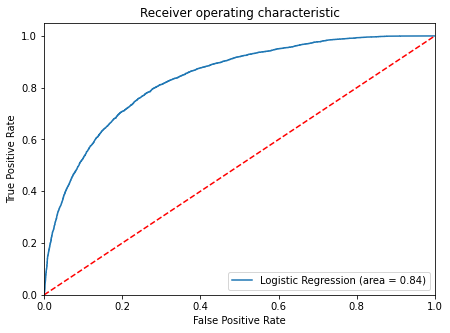

In [57]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The above curve will be used to maximize the difference between the true positive rate and false positive rate for the current model. The purpose is to find a threshold that better tunes the model.

In [58]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.25547583853223843


With this new threshold, its time to evaluate the model.

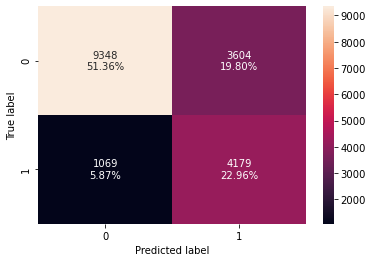

In [59]:
# Create the confusion matrix with the new threshold.
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [60]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.743,0.796,0.537,0.641


The recall score has risen significantly vs. the default model.

One more method to use to fine-tune the model is plotting the precision and recall curves. 

If the goal was to maximize the f1 score the area of intersection would likely yield the best performing theshold for this model.

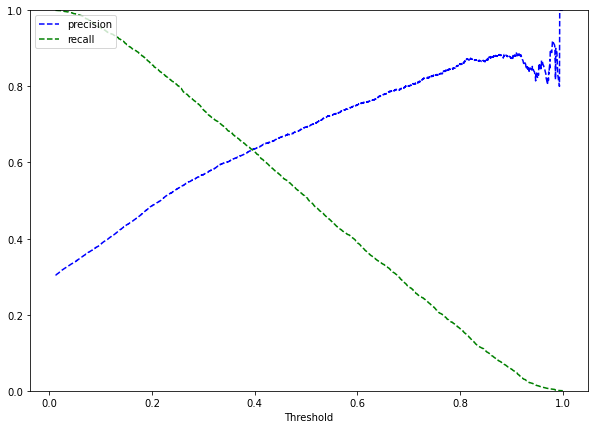

In [61]:
# Use the training data to plot the recall vs. precision and identify the best threshold.
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Based on the above graph, the ideal model for maximizing the f1_score is roughly 0.4. 

Since the current model will be used to maximize recall, this will likely not be the best model.

In [62]:
# setting the threshold based on the above curve.
optimal_threshold_curve = 0.4

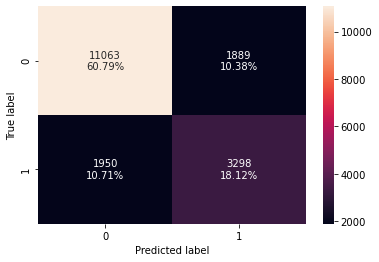

In [63]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [64]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.789,0.628,0.636,0.632


Compare the different models by creating a dataframe below.

In [65]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression default",
    "Logistic Regression AUC",
    "Logistic Regression Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression default,Logistic Regression AUC,Logistic Regression Threshold
Accuracy,0.794,0.743,0.789
Recall,0.510,0.796,0.628
Precision,0.693,0.537,0.636
F1,0.587,0.641,0.632


Based on the training data, the AUC tuning of the Logistic Regression model maximizes the recall score.

#### Evaluating the models on the test data

In [66]:
# Copy the final dataset format to the test data.
X_test3 = X_test[list(X_train3.columns)]

Default tuning

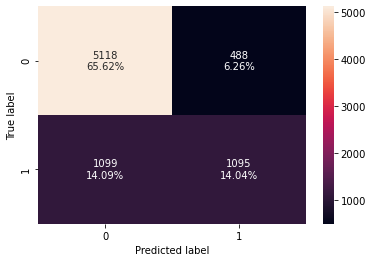

In [67]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [68]:
# checking model performance for this model
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Training performance:")
log_reg_model_test_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.797,0.499,0.692,0.580


Area Under Curve Tuning

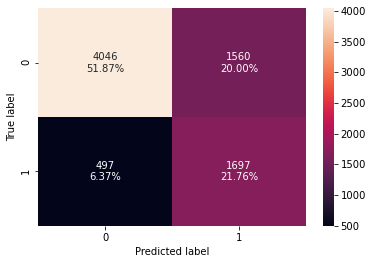

In [69]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [70]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc = model_performance_classification_statsmodels(lg3, X_test3, y_test, threshold = optimal_threshold_auc_roc)

log_reg_model_test_perf_threshold_auc

,Accuracy,Recall,Precision,F1
0,0.736,0.773,0.521,0.623


Threshold Maximization Tuning

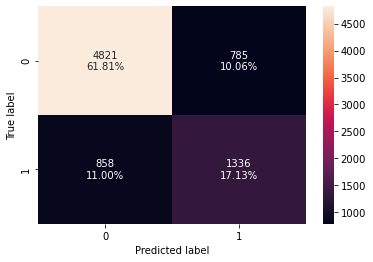

In [71]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [72]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg3, X_test3, y_test, threshold = optimal_threshold_curve)

log_reg_model_test_perf_threshold_curve

,Accuracy,Recall,Precision,F1
0,0.789,0.609,0.630,0.619


In [73]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Default",
    "Logistic Regression AUC",
    "Logistic Regression Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression Default,Logistic Regression AUC,Logistic Regression Threshold
Accuracy,0.797,0.736,0.789
Recall,0.499,0.773,0.609
Precision,0.692,0.521,0.630
F1,0.580,0.623,0.619


Similar to the training data, the AUC tuning of the Logistic Regression model best maximizes the recall score.

## Final Model Summary

Based on the above analysis, tuning the model with AUC yields the highest recall score for both the training and test data. 

As a recap, the values are shown again below.

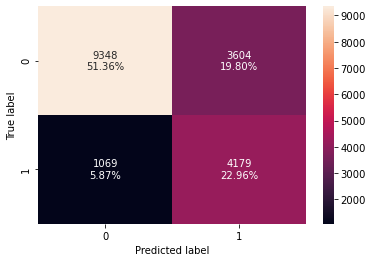

In [74]:
# Create the confusion matrix with the new threshold.
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.743,0.796,0.537,0.641


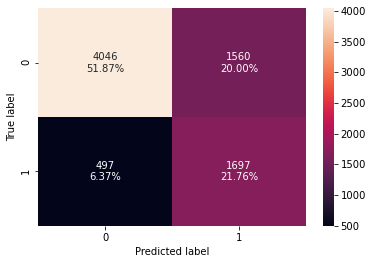

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [77]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc = model_performance_classification_statsmodels(lg3, X_test3, y_test, threshold = optimal_threshold_auc_roc)

log_reg_model_test_perf_threshold_auc

,Accuracy,Recall,Precision,F1
0,0.736,0.773,0.521,0.623


Based on the performance of this model, there is likely a better method for predicting the booking statuses.

## Building a Decision Tree model

Since strong multicollinearity was identified during the previous model. It will remain removed for the construction of this model as well.

In [78]:
# functions provided during Great Learning Lectures
#  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [79]:
# functions provided during Great Learning Lectures
# Function to create a confusion matrix with sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [80]:
# Create the decision tree model.
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [81]:
# Fit the model with the training data
model.fit(X_train3, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

Time to evaluate the model with a confusion matrix.

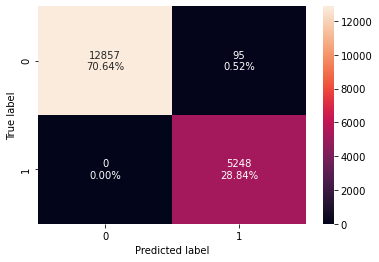

In [82]:
#creating the confusion matrix
confusion_matrix_sklearn(model, X_train3, y_train)

In [83]:
decision_tree_perf_train = get_recall_score(model, X_train3, y_train)

decision_tree_perf_train

1.0

Since the recall score is 1.0, the model has overfit to the training data. To confirm, I will check it on the test data.

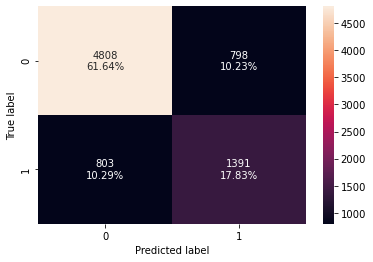

In [84]:
#create the confusion matrix
confusion_matrix_sklearn(model, X_test3, y_test)

In [85]:
decision_tree_perf_test = get_recall_score(model, X_test3, y_test)

decision_tree_perf_test

0.6340018231540565

As expected, the model is overfit to the training data and giving a poor recall score for the test data. 

Because of this, the model needs pruned.

## Do we need to prune the tree?

#### Pre-Pruning

First type of pruning to try is a pre-pruning method for Grid Search to identify the optimal parameters for the model.

In [86]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train3, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train3, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=1e-05,
                       random_state=1)

Now that the model has been pruned, time to evaluate.

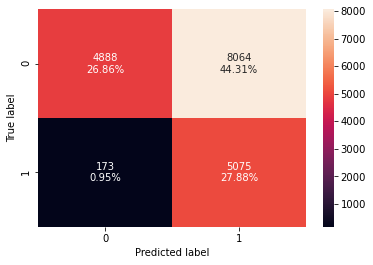

In [87]:
#creating the confusion matrix
confusion_matrix_sklearn(estimator, X_train3, y_train)

In [88]:
decision_tree_grid_train = get_recall_score(estimator, X_train3, y_train)

decision_tree_grid_train

0.9670350609756098

The model is more generalized now and not giving a perfect recall score. This means the model may have a chance of accurately predicting the test data.

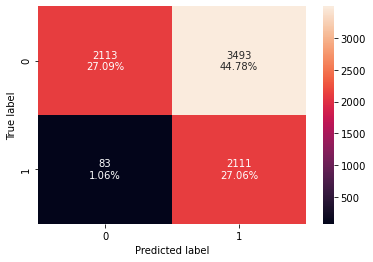

In [89]:
confusion_matrix_sklearn(estimator, X_test3, y_test)

In [90]:
decision_tree_grid_test = get_recall_score(estimator, X_test3, y_test)

decision_tree_grid_test

0.9621695533272562

The model has greatly improved! The model is now general enough that the recall value on the test set is 94%, a very good model.

Before finalizing this model, I will also evaluate post-pruning techniques.

#### Post Pruning

Perform Cost Complexity pruning as a post-pruning method.

In [91]:
#perform cost complexity pruning on the model.
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [92]:
# create a dataframe of the path variables
pd.DataFrame(path).head()

,ccp_alphas,impurities
0,0.000,0.004
1,0.000,0.004
2,0.000,0.004
3,0.000,0.004
4,0.000,0.004


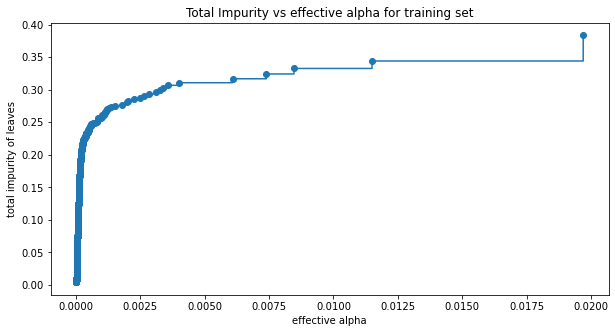

In [93]:
# Plot the curve for alphas vs impurity
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [94]:
# Create a new dataframe to store a model with each value of alpha
# Diplsay the final node to verify the root node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train3, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03900325649275127


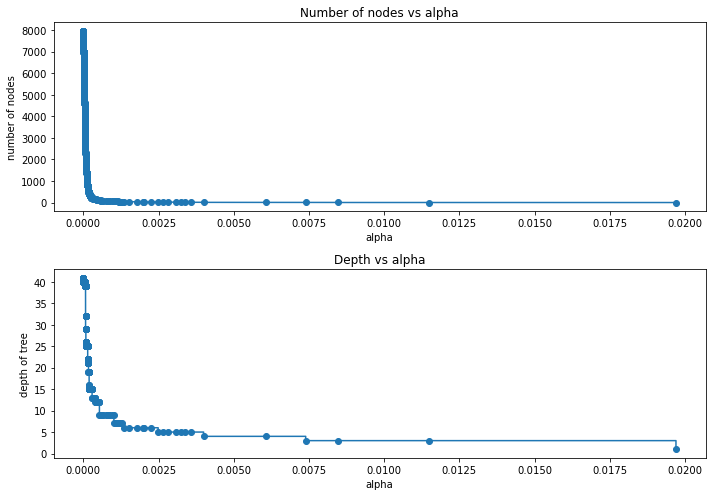

In [95]:
#Remove the root node since this is not a helpful decision tree.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot the node number vs. depth of tree as a sanity check
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As expected, as the number of nodes decreases vs alpha, so does the tree depth. 

In [96]:
# Save the recall scores for each model created in clf with training data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train3)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [97]:
# Save the recall scores for each model created in clf with test data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test3)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

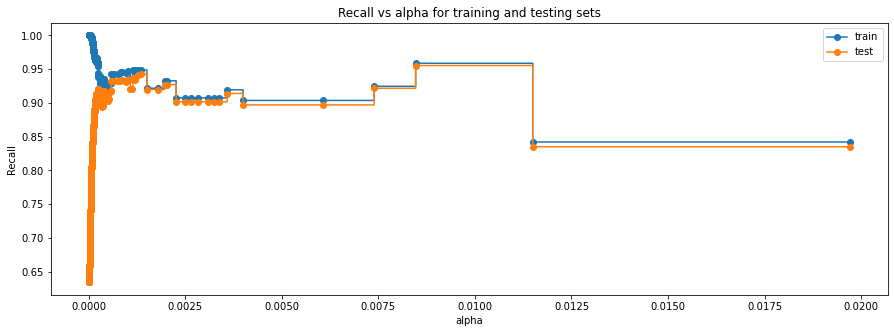

In [98]:
# Create a plot to observe the recall scores for training and test scores simultaneously
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on the above chart, the optimal alpha value to maximize the model recall is around 0.008

Now a model will be created with this value of alpha.

In [99]:
# creating the model where we get highest train and test recall
index_alpha_model = np.argmax(recall_test)
alpha_model = clfs[index_alpha_model]
print(alpha_model)

DecisionTreeClassifier(ccp_alpha=0.008466180066654602,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [100]:
# Fit the new model to the training data
alpha_model.fit(X_train3, y_train)

DecisionTreeClassifier(ccp_alpha=0.008466180066654602,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

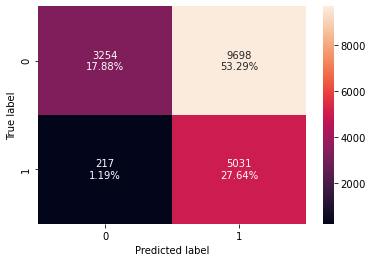

In [101]:
# creating the confusion matrix for this model
confusion_matrix_sklearn(alpha_model, X_train3, y_train)

In [102]:
# evaluate new model
decision_tree_post_prune_train = get_recall_score(alpha_model, X_train3, y_train)

decision_tree_post_prune_train

0.9586509146341463

The recall for the test data is mostly generalized from post-pruning. Time to see how the test data performs.

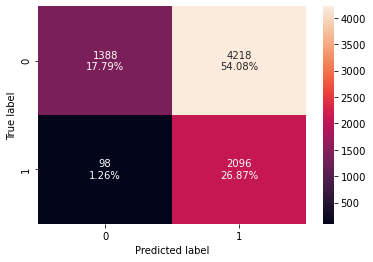

In [103]:
# creating confusion matrix for test data
confusion_matrix_sklearn(alpha_model, X_test3, y_test)

In [104]:
# evaluate new model on test data
decision_tree_post_prune_test = get_recall_score(alpha_model, X_test3, y_test)

decision_tree_post_prune_test

0.9553327256153145

The model is performing very well and is generalized. The model yields very similar results for the training and testing data. 

## Model Evaluation

In [105]:
# test performance comparison

print('Decision Tree Evaluation:')
print(f'Decision Tree No Prune: {np.round(decision_tree_perf_test, 3)}')
print(f'Decision Tree Pre-Prune: {np.round(decision_tree_grid_test, 3)}')
print(f'Decision Tree Pre-Prune: {np.round(decision_tree_post_prune_test, 3)}')

Decision Tree Evaluation:
Decision Tree No Prune: 0.634
Decision Tree Pre-Prune: 0.962
Decision Tree Pre-Prune: 0.955


Based on the models created, the pre-pruned decision tree gives the best model to maximize the recall score.

Time to visualize the final decision tree!

In [106]:
## creating a list of column names
feature_names = X_train3.columns.to_list()

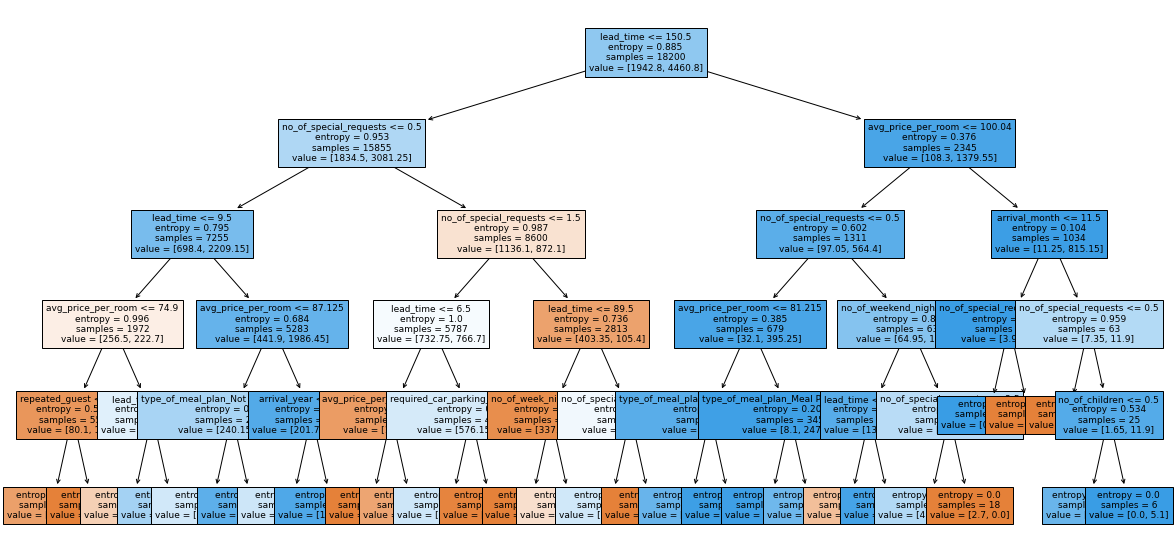

In [107]:
# Create a plot to visualize the decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [108]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)


                                 Imp
lead_time                      0.411
no_of_special_requests         0.314
avg_price_per_room             0.140
no_of_week_nights              0.046
type_of_meal_plan_Not Selected 0.024
arrival_year                   0.018
required_car_parking_space     0.017
arrival_month                  0.017
no_of_weekend_nights           0.008
repeated_guest                 0.004
type_of_meal_plan_Meal Plan 2  0.002
no_of_children                 0.001
const                          0.000
room_type_reserved_Room_Type 5 0.000
room_type_reserved_Room_Type 6 0.000
room_type_reserved_Room_Type 7 0.000


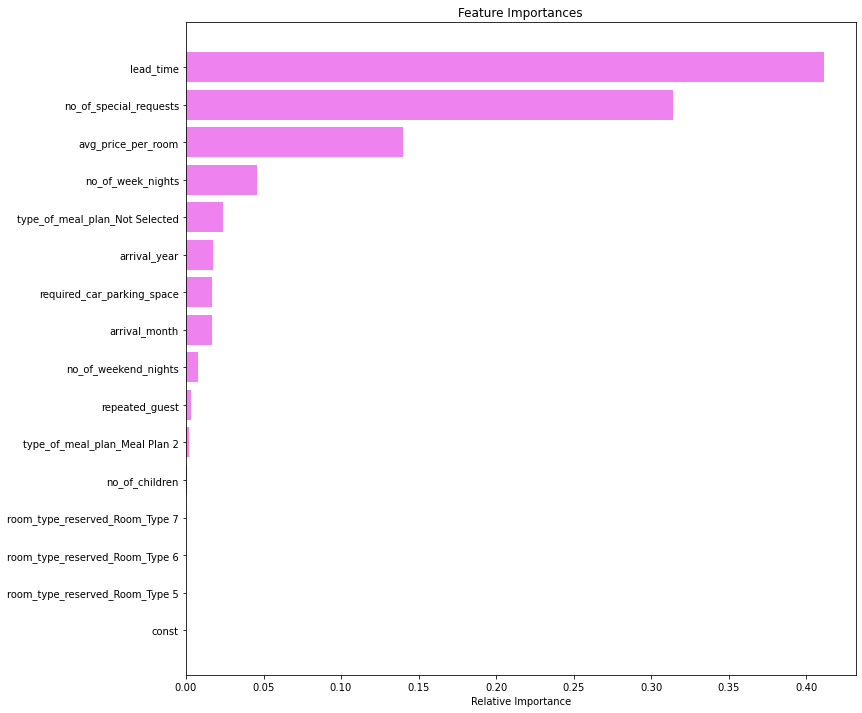

In [109]:
# save the importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

# Create plot for the important variables
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on the best model, the above graph shows the most important features for predicting a cancellation.

## Model Performance Comparison and Conclusions

In [110]:
print('Logistic Regression Evaluation:')
print(models_test_comp_df.T['Recall'])
print('\n')
print('Decision Tree Evaluation:')
print(f'Decision Tree No Prune: {np.round(decision_tree_perf_test, 3)}')
print(f'Decision Tree Pre-Prune: {np.round(decision_tree_grid_test, 3)}')
print(f'Decision Tree Pre-Prune: {np.round(decision_tree_post_prune_test, 3)}')

Logistic Regression Evaluation:
Logistic Regression Default     0.499
Logistic Regression AUC         0.773
Logistic Regression Threshold   0.609
Name: Recall, dtype: float64


Decision Tree Evaluation:
Decision Tree No Prune: 0.634
Decision Tree Pre-Prune: 0.962
Decision Tree Pre-Prune: 0.955


Based on all of the models evaluated on this data set, the Decision Tree with Pre-Pruning yields the best results with regards to maximizing the recall score.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Based on the data provided, the model shows that the most important variables are lead time, number of special requests, and the average price of a room.
Because of this the following considerations should be made:
<li>Offer Free Cancellation until ~155 days from reservation. At that point, a small surcharge can be applied to not miss out on lost revenue. If the booking is not cancelled at the 150.5 day mark, the likelihood it will be cancelled is reduced.</li>
<li> Alternatively, offering free cancellation AFTER the 155 day mark, as customers are less likely to cancel in this window.</li>
<li>Offer clear areas to input special requests, especially in the online booking platform as it is the highest used booking method. The more special requests, the less likely a booking is to be cancelled. If it is easier to make a special request, there is a chance cancellations would be reduced.</li>
<li>The average price of room also has an impact on the cancellation rate. Perhaps offer a deal on rooms at the ideal lead time (not in this analysis) to prevent cancellations. </li>